# Time Series Components
Level: The average value in the series.

ETS Model
Residual or Error: The random variation in the series.
Trend: The increasing or decreasing value in the series.
Seasonality: The repeating short-term cycle in the series.

Decomposition

In [141]:
import pandas as pd
df = pd.read_csv("C:/Users/User/Downloads/Bookings.csv")
print(df.head())

   Year Month  Bookings
0  2006   Jan       383
1  2006   Feb       366
2  2006   Mar       250
3  2006   Apr       318
4  2006   May       334


In [121]:
# deal with missing values. see issue
df.Bookings.interpolate(inplace=True)

In [48]:
#print(series['Bookings'].head())
#print(type(series))

In [112]:
def month_string_to_number(string):
    m = {
        'jan': '1',
        'feb': '2',
        'mar': '3',
        'apr': '4',
         'may': '5',
         'jun':'6',
         'jul':'7',
         'aug':'8',
         'sep':'9',
         'oct':'10',
         'nov':'11',
         'dec':'12'
        }
    s = string.strip()[:3].lower()
    #s = string.lower()

    try:
        out = m[s]
        return out
    except:
        raise ValueError('Not a month')

In [142]:
import numpy as np

sLength = len(df['Month'])
#df['MonthNumber'] = Series(np.random.randn(sLength), index=df.index)
df['MonthNumber'] = Series(0, index=df.index)
df['month'] = Series(0, index=df.index)


In [128]:
for month in range(0,len(df.Month)-1): {
    #print(month)
    #print(month_string_to_number(df.Month[month]))
    df.MonthNumber[month] = month_string_to_number(df.Month[month])
}
#month_string_to_number("October")

SyntaxError: invalid syntax (<ipython-input-128-e7d2439a48d6>, line 4)

In [125]:
#type(df.Month[0])
len(df.Month)
month_string_to_number(df.Month[0])

'1'

In [143]:
df.Month

0      Jan
1      Feb
2      Mar
3      Apr
4      May
5      Jun
6      Jul
7      Aug
8      Sep
9      Oct
10     Nov
11     Dec
12     Jan
13     Feb
14     Mar
15     Apr
16     May
17     Jun
18     Jul
19     Aug
20     Sep
21     Oct
22     Nov
23     Dec
24     Jan
25     Feb
26     Mar
27     Apr
28     May
29     Jun
      ... 
90     Jul
91     Aug
92     Sep
93     Oct
94     Nov
95     Dec
96     Jan
97     Feb
98     Mar
99     Apr
100    May
101    Jun
102    Jul
103    Aug
104    Sep
105    Oct
106    Nov
107    Dec
108    Jan
109    Feb
110    Mar
111    Apr
112    May
113    Jun
114    Jul
115    Aug
116    Sep
117    Oct
118    Nov
119    Dec
Name: Month, Length: 120, dtype: object

In [144]:
#df.MonthNumber[0]
df.month = df.Month.apply(month_string_to_number)

In [146]:
df.month

0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8
8       9
9      10
10     11
11     12
12      1
13      2
14      3
15      4
16      5
17      6
18      7
19      8
20      9
21     10
22     11
23     12
24      1
25      2
26      3
27      4
28      5
29      6
       ..
90      7
91      8
92      9
93     10
94     11
95     12
96      1
97      2
98      3
99      4
100     5
101     6
102     7
103     8
104     9
105    10
106    11
107    12
108     1
109     2
110     3
111     4
112     5
113     6
114     7
115     8
116     9
117    10
118    11
119    12
Name: month, Length: 120, dtype: object

In [150]:
df = df.assign(Date=pd.to_datetime(df[['Year', 'month']].assign(day=1)))

In [151]:
df.head()

,Year,Month,Bookings,MonthNumber,month,Date
0,2006,Jan,383,0,1,2006-01-01
1,2006,Feb,366,0,2,2006-02-01
2,2006,Mar,250,0,3,2006-03-01
3,2006,Apr,318,0,4,2006-04-01
4,2006,May,334,0,5,2006-05-01


In [152]:
#Set datetime index
#df['Date'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df = df.set_index('Date')

In [153]:
df.head()

,Year,Month,Bookings,MonthNumber,month
Date,,,,,
2006-01-01,2006,Jan,383,0,1
2006-02-01,2006,Feb,366,0,2
2006-03-01,2006,Mar,250,0,3
2006-04-01,2006,Apr,318,0,4
2006-05-01,2006,May,334,0,5


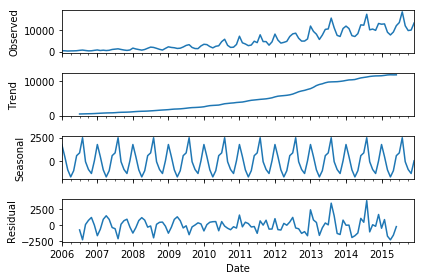

In [154]:
res = sm.tsa.seasonal_decompose(df.Bookings)
resplot = res.plot()
resplot

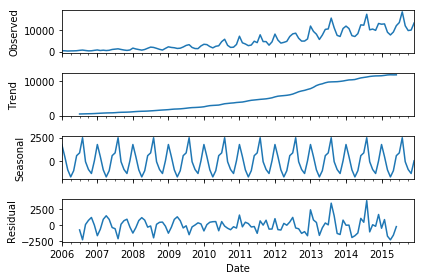

In [167]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

result = seasonal_decompose(df.Bookings)
result.plot()
pyplot.show()

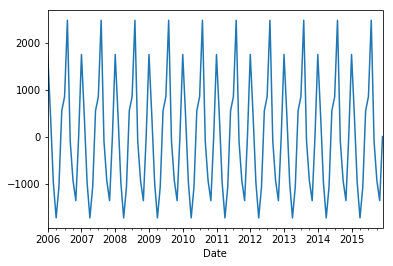

In [166]:
result.seasonal.plot()
pyplot.show()

In [155]:
from statsmodels.tsa.seasonal import seasonal_decompose
#series = ...
result = seasonal_decompose(df.Bookings, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

Date
2006-01-01             NaN
2006-02-01             NaN
2006-03-01             NaN
2006-04-01             NaN
2006-05-01             NaN
2006-06-01             NaN
2006-07-01      441.750000
2006-08-01      462.583333
2006-09-01      484.708333
2006-10-01      508.000000
2006-11-01      526.000000
2006-12-01      561.625000
2007-01-01      609.333333
2007-02-01      656.875000
2007-03-01      701.041667
2007-04-01      737.250000
2007-05-01      760.625000
2007-06-01      774.125000
2007-07-01      816.416667
2007-08-01      882.458333
2007-09-01      924.625000
2007-10-01      944.750000
2007-11-01      968.000000
2007-12-01     1006.708333
2008-01-01     1069.416667
2008-02-01     1135.666667
2008-03-01     1184.416667
2008-04-01     1219.666667
2008-05-01     1240.125000
2008-06-01     1278.791667
                  ...     
2013-07-01     9621.458333
2013-08-01     9675.333333
2013-09-01     9702.000000
2013-10-01     9731.041667
2013-11-01     9816.041667
2013-12-01     9931.625

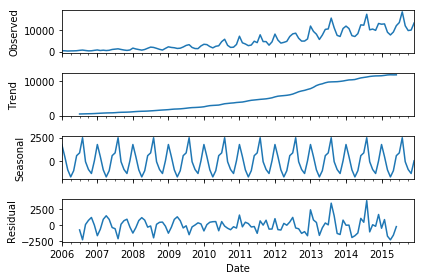

In [163]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
#series = ...
result = seasonal_decompose(df.Bookings, model='additive')
result.plot()
pyplot.show()

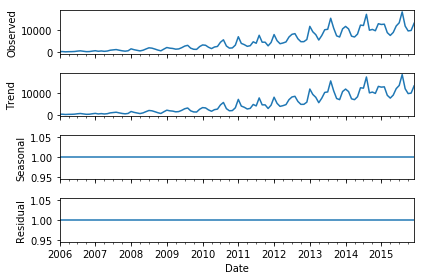

In [159]:
result = seasonal_decompose(df.Bookings, model='multiplicative', freq=1)
result.plot()
pyplot.show()

# Generated example

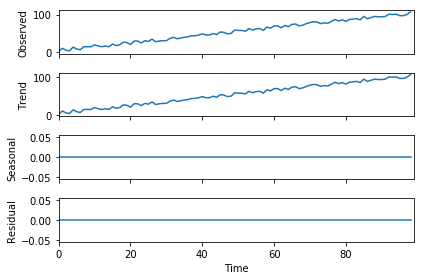

In [15]:
from random import randrange
from pandas import datetools
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', freq=1)
result.plot()
pyplot.show()

In [17]:
print(type(series))

<class 'list'>


# Another Example

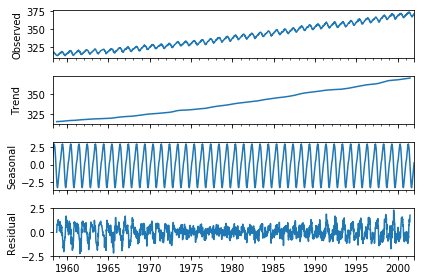

In [27]:
import statsmodels.api as sm

dta = sm.datasets.co2.load_pandas().data
# deal with missing values. see issue
dta.co2.interpolate(inplace=True)

res = sm.tsa.seasonal_decompose(dta.co2)
resplot = res.plot()
resplot

In [35]:
print(dta.co2)

1958-03-29    316.100000
1958-04-05    317.300000
1958-04-12    317.600000
1958-04-19    317.500000
1958-04-26    316.400000
1958-05-03    316.900000
1958-05-10    317.200000
1958-05-17    317.500000
1958-05-24    317.900000
1958-05-31    317.550000
1958-06-07    317.200000
1958-06-14    316.850000
1958-06-21    316.500000
1958-06-28    316.150000
1958-07-05    315.800000
1958-07-12    315.800000
1958-07-19    315.400000
1958-07-26    315.500000
1958-08-02    315.600000
1958-08-09    315.100000
1958-08-16    315.000000
1958-08-23    314.550000
1958-08-30    314.100000
1958-09-06    313.500000
1958-09-13    313.444444
1958-09-20    313.388889
1958-09-27    313.333333
1958-10-04    313.277778
1958-10-11    313.222222
1958-10-18    313.166667
                 ...    
2001-06-09    373.100000
2001-06-16    372.800000
2001-06-23    372.900000
2001-06-30    372.700000
2001-07-07    372.100000
2001-07-14    371.300000
2001-07-21    371.200000
2001-07-28    370.600000
2001-08-04    369.900000


In [25]:
#res.resid
#res.seasonal
#res.trend